In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit
%matplotlib inline
import random

data = pd.read_csv('Clean.csv')
data = data.drop(['Unnamed: 0','currency','ship_class','is_ip_blacklisted', 'is_email_blacklisted'],axis=1)

In [27]:
rindex =  np.array(random.sample(range(5000,100000), 5000))
dt = data[data['is_fraud']==0]
data_nf_sample = dt.ix[rindex]
data_fr = data[data['is_fraud']==1]

/Users/cristiangavrus/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  This is separate from the ipykernel package so we can avoid doing imports until


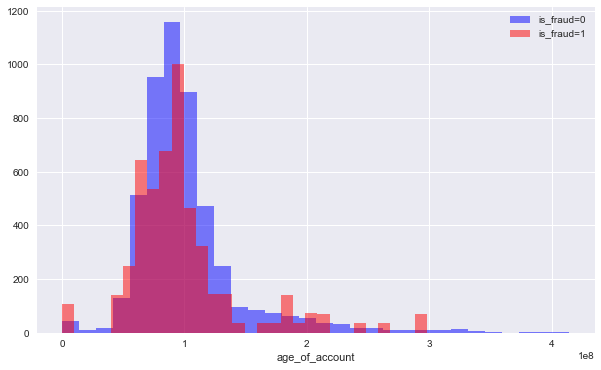

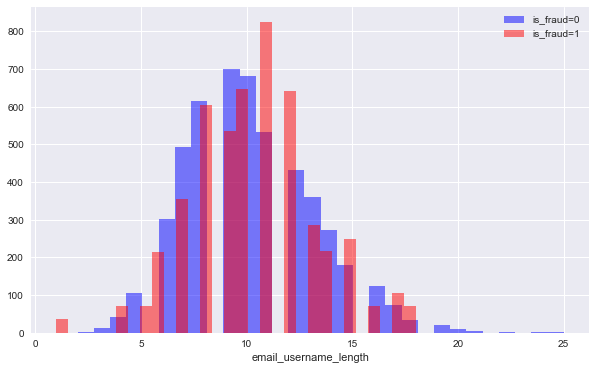

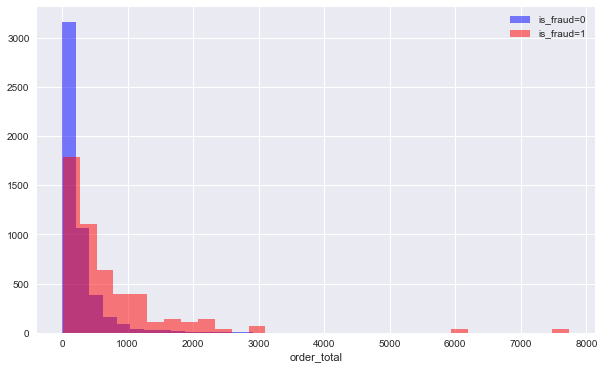

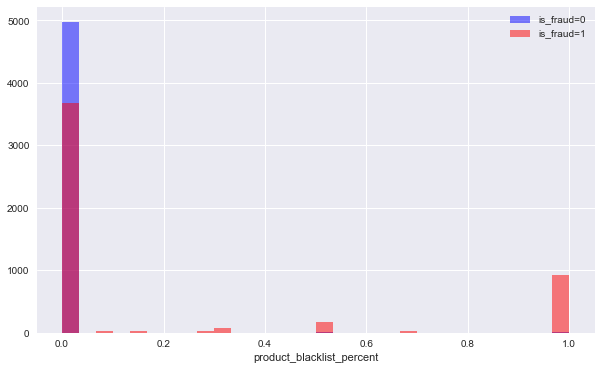

In [53]:
ls = ['age_of_account','email_username_length','order_total','product_blacklist_percent']
for col in ls:

    plt.figure(figsize=(10,6))
    data_nf_sample[col].hist(alpha=0.5,bins=30,color='blue',label='is_fraud=0')
    data_fr[col].hist(alpha=0.5,bins=30,color='red',label='is_fraud=1')
    plt.legend()
    plt.xlabel(col)

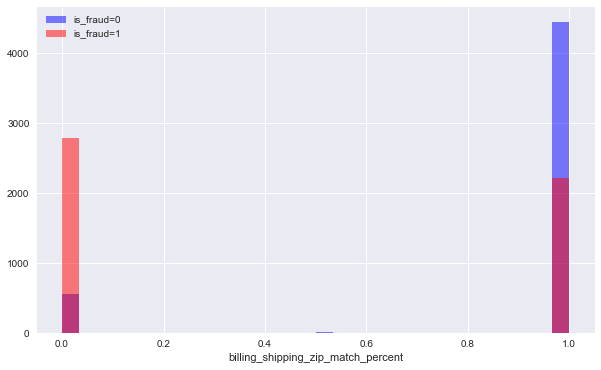

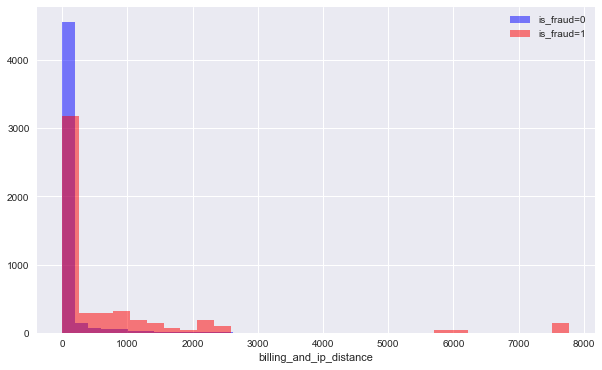

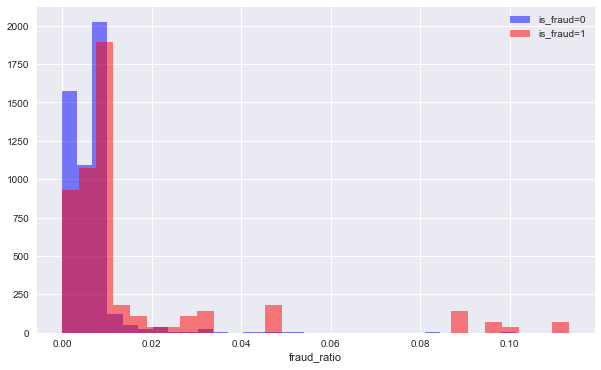

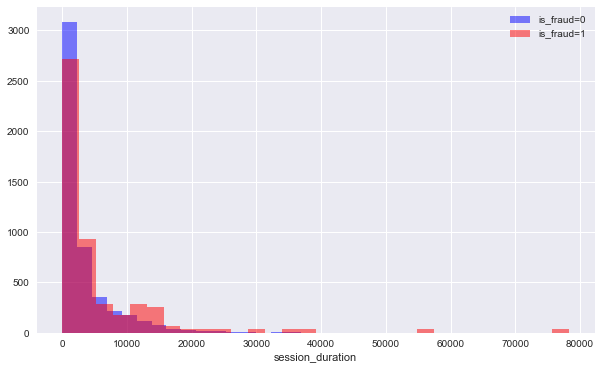

In [66]:
ls = ['billing_shipping_zip_match_percent','billing_and_ip_distance','fraud_ratio','session_duration']
# plt.xlim(0,50)
# plt.ylim(0,6000)
for col in ls:
    
    plt.figure(figsize=(10,6))
    data_nf_sample[col].hist(alpha=0.5,bins=30,color='blue',label='is_fraud=0')
    data_fr[col].hist(alpha=0.5,bins=30,color='red',label='is_fraud=1')
    plt.legend()
    plt.xlabel(col)

In [37]:
data2 = pd.concat([data_nf_sample,data_fr])

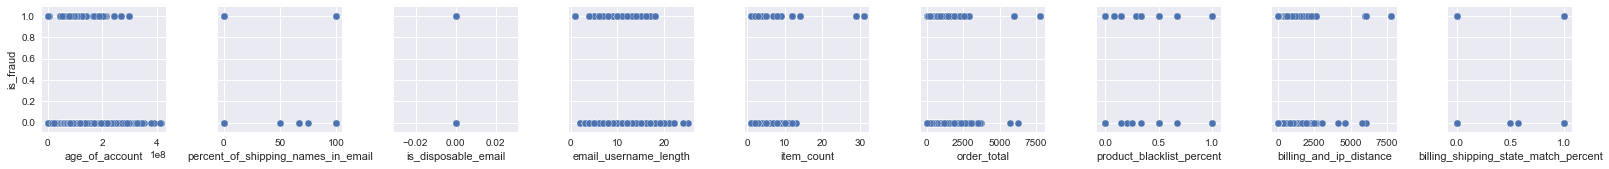

In [38]:
sns.pairplot(data=data2, 
                  y_vars=['is_fraud'],
                  x_vars=['age_of_account', 'percent_of_shipping_names_in_email','is_disposable_email','email_username_length', 'item_count',
'order_total','product_blacklist_percent', 'billing_and_ip_distance','billing_shipping_state_match_percent'  ])

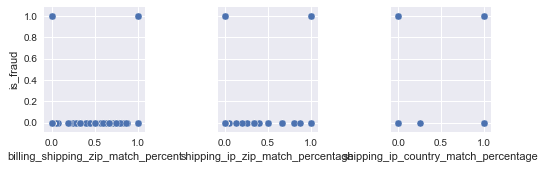

In [39]:
sns.pairplot(data=data, 
                  y_vars=['is_fraud'],
                  x_vars=['billing_shipping_zip_match_percent', 'shipping_ip_zip_match_percentage','shipping_ip_country_match_percentage'] )

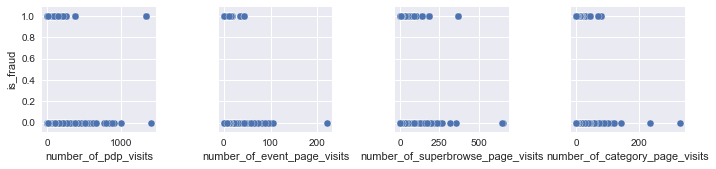

In [42]:
sns.pairplot(data=data2, 
                  y_vars=['is_fraud'],
                  x_vars=data.columns[22:26])

In [43]:
colname = data.columns[22:26]
colname

Index(['number_of_pdp_visits', 'number_of_event_page_visits',
       'number_of_superbrowse_page_visits', 'number_of_category_page_visits'],
      dtype='object')

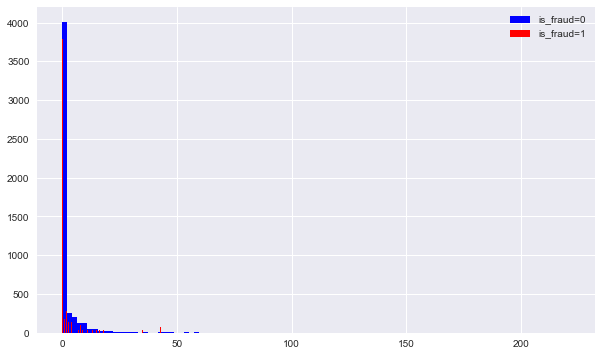

In [57]:
plt.figure(figsize=(10,6))
#plt.xlim(2,60)
# plt.ylim(0,6000)
data_nf_sample['number_of_event_page_visits'].hist(bins=100,color='blue',label='is_fraud=0')
data_fr['number_of_event_page_visits'].hist(bins=100,color='red',label='is_fraud=1')
plt.legend()